In [15]:
#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


    100% |████████████████████████████████| 5.5MB 340kB/s  eta 0:00:01


In [84]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
Amazon = yf.Ticker("AMZN")

In [19]:
Amazon.info["sector"]

'Consumer Cyclical'

In [20]:
start = datetime.datetime(2012,5,31) 
end = datetime.datetime(2013,1,30)
print(Amazon.history(start=start, end=end))

                  Open        High         Low       Close    Volume  \
Date                                                                   
2012-05-30  212.139999  212.979996  207.750000  209.229996   4078200   
2012-05-31  209.479996  213.789993  207.110001  212.910004   4944000   
2012-06-01  208.440002  211.229996  207.300003  208.220001   3951500   
2012-06-04  207.399994  215.350006  206.369995  214.570007   4299600   
2012-06-05  213.850006  216.860001  211.160004  213.210007   3543900   
...                ...         ...         ...         ...       ...   
2013-01-23  270.570007  271.089996  266.649994  268.109985   2508900   
2013-01-24  269.369995  276.649994  269.369995  273.459991   3417000   
2013-01-25  275.000000  284.720001  274.399994  283.989990   4968100   
2013-01-28  283.779999  284.480011  274.399994  276.040009   4321400   
2013-01-29  275.350006  275.459991  258.350006  260.350006  10172600   

            Dividends  Stock Splits  
Date                     

## Get all current S&P500 Stock data

In [24]:
# https://tcoil.info/how-to-get-list-of-companies-in-sp-500-with-python/


payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
print(df)

    Symbol             Security SEC filings             GICS Sector  \
0      MMM                   3M     reports             Industrials   
1      ABT  Abbott Laboratories     reports             Health Care   
2     ABBV               AbbVie     reports             Health Care   
3     ABMD              Abiomed     reports             Health Care   
4      ACN            Accenture     reports  Information Technology   
..     ...                  ...         ...                     ...   
500    YUM          Yum! Brands     reports  Consumer Discretionary   
501   ZBRA   Zebra Technologies     reports  Information Technology   
502    ZBH        Zimmer Biomet     reports             Health Care   
503   ZION        Zions Bancorp     reports              Financials   
504    ZTS               Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota   
1          

In [25]:
symbols = df['Symbol'].values.tolist()
print(symbols[:15])

names = df['Security'].values.tolist()
print(names[:15])

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK']
['3M', 'Abbott Laboratories', 'AbbVie', 'Abiomed', 'Accenture', 'Activision Blizzard', 'Adobe', 'Advanced Micro Devices', 'Advance Auto Parts', 'AES Corp', 'Aflac', 'Agilent Technologies', 'Air Products & Chemicals', 'Akamai Technologies', 'Alaska Air Group']


In [27]:
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)
print(len(sectors),
      sectors)



11 {'Health Care', 'Financials', 'Consumer Discretionary', 'Communication Services', 'Industrials', 'Consumer Staples', 'Utilities', 'Materials', 'Information Technology', 'Energy', 'Real Estate'}


In [69]:
real_estate_symbs  = df[df['GICS Sector'] == 'Real Estate']['Symbol'].values.tolist()
print(real_estate_symbs)

['ARE', 'AMT', 'AVB', 'BXP', 'CBRE', 'CCI', 'DLR', 'DRE', 'EQIX', 'EQR', 'ESS', 'EXR', 'FRT', 'PEAK', 'HST', 'IRM', 'KIM', 'MAA', 'PLD', 'PSA', 'O', 'REG', 'SBAC', 'SPG', 'UDR', 'VTR', 'VNO', 'WELL', 'WY']


In [30]:

real_estate_df = df[df['GICS Sector'] == 'Real Estate']
real_estate_symbols = real_estate_df['Symbol'].values.tolist()

print(real_estate_symbols)

['ARE', 'AMT', 'AVB', 'BXP', 'CBRE', 'CCI', 'DLR', 'DRE', 'EQIX', 'EQR', 'ESS', 'EXR', 'FRT', 'PEAK', 'HST', 'IRM', 'KIM', 'MAA', 'PLD', 'PSA', 'O', 'REG', 'SBAC', 'SPG', 'UDR', 'VTR', 'VNO', 'WELL', 'WY']


In [57]:
# SP500 complete
start=datetime.datetime(1995, 1, 1)
end=datetime.datetime(2021, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end)


In [59]:
print(SP500.index)

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)


In [64]:
len(0*SP500["Close"])

6547

In [70]:
def SectorPrices(sec, start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [71]:
SectorPrices("Real Estate", start, end)

Date
1995-01-03      71.326278
1995-01-04      71.497539
1995-01-05      71.538372
1995-01-06      71.322944
1995-01-09      71.496336
                 ...     
2020-12-24    1307.739234
2020-12-28    1320.167468
2020-12-29    1303.770288
2020-12-30    1315.966419
2020-12-31    1329.620789
Name: Close, Length: 6547, dtype: float64

In [68]:
RealEstateStocks = 0*SP500["Close"]
for sym in real_estate_symbols:
    print(sym)
    StockData = yf.Ticker(sym)
    StockData = StockData.history(start=datetime.datetime(1995, 1, 1), 
                                  end=datetime.datetime(2021, 1, 1))
    StockData = StockData["Close"]
    
    # Only add stocks to sector data which have full history
    if len(StockData.index) == len(SP500.index):
        print(len(RealEstateStocks), len(StockData))
        RealEstateStocks = RealEstateStocks.add(StockData)
        

print(RealEstateStocks)

ARE
AMT
AVB
6547 6547
BXP
CBRE
CCI
DLR
DRE
6547 6547
EQIX
EQR
6547 6547
ESS
6547 6547
EXR
FRT
6547 6547
PEAK
6547 6547
HST
6547 6547
IRM
KIM
6547 6547
MAA
6547 6547
PLD
PSA
6547 6547
O
6547 6547
REG
6547 6547
SBAC
SPG
6547 6547
UDR
6547 6547
VTR
VNO
6547 6547
WELL
6547 6547
WY
6547 6547
Date
1995-01-03      71.326283
1995-01-04      71.497544
1995-01-05      71.538383
1995-01-06      71.322936
1995-01-09      71.496337
                 ...     
2020-12-24    1307.739216
2020-12-28    1320.167489
2020-12-29    1303.770267
2020-12-30    1315.966423
2020-12-31    1329.620798
Name: Close, Length: 6547, dtype: float64


In [ ]:
def SectorPrices(sec, start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [52]:
print(StockData.index[0])
print(StockData.index[0] == datetime.datetime(1995, 1, 3))

1995-01-03 00:00:00
True


In [72]:
Seclist = list()


['I']


In [79]:
SectorsDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    SectorsDF[s] = SectorPrices(s, start, end)
    

Health Care
- OGN: Data doesn't exist for startDate = 788914800, endDate = 1609455600
Financials
- BRK.B: No data found, symbol may be delisted
Consumer Discretionary
Communication Services
Industrials
Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
Utilities
Materials
Information Technology
Energy
Real Estate


In [80]:
print(SectorsDF)

            Health Care   Financials  Consumer Discretionary  \
Date                                                           
1995-01-03   252.536228   422.520369              179.047661   
1995-01-04   252.162853   421.681724              178.541232   
1995-01-05   253.021434   421.635561              178.926074   
1995-01-06   254.520722   422.265567              178.490130   
1995-01-09   255.681090   422.439001              178.938541   
...                 ...          ...                     ...   
2020-12-24  8151.506901  3881.876234             8621.035822   
2020-12-28  8154.417374  3893.463562             8543.670601   
2020-12-29  8172.589890  3878.364791             8470.905934   
2020-12-30  8171.484985  3910.681441             8482.546898   
2020-12-31  8260.434713  3963.974326             8436.160795   

            Communication Services  Industrials  Consumer Staples  \
Date                                                                
1995-01-03               46.7

In [82]:
SectorsDF.index

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert t

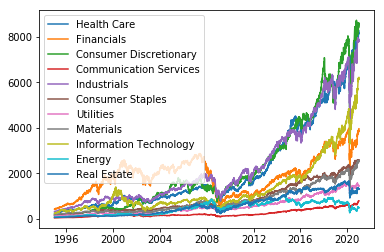

In [86]:
for i in SectorsDF.columns:
    plt.plot(SectorsDF.index,SectorsDF[i], label = i)
plt.legend()
plt.show()

In [87]:
SectorsDF.corr()

,Health Care,Financials,Consumer Discretionary,Communication Services,Industrials,Consumer Staples,Utilities,Materials,Information Technology,Energy,Real Estate
Health Care,1.000000,0.702831,0.988327,0.987902,0.991078,0.988778,0.981672,0.984732,0.969113,0.655183,0.927662
Financials,0.702831,1.000000,0.712778,0.772979,0.714916,0.674960,0.688716,0.677433,0.741520,0.382736,0.612228
Consumer Discretionary,0.988327,0.712778,1.000000,0.982749,0.992310,0.987094,0.985234,0.988445,0.960444,0.670262,0.940100
Communication Services,0.987902,0.772979,0.982749,1.000000,0.987086,0.981734,0.975149,0.976221,0.967106,0.646336,0.921607
Industrials,0.991078,0.714916,0.992310,0.987086,1.000000,0.988301,0.988340,0.994866,0.963172,0.705057,0.944046
Consumer Staples,0.988778,0.674960,0.987094,0.981734,0.988301,1.000000,0.989987,0.989731,0.938550,0.716360,0.962984
Utilities,0.981672,0.688716,0.985234,0.975149,0.988340,0.989987,1.000000,0.989725,0.945063,0.720934,0.961197
Materials,0.984732,0.677433,0.988445,0.976221,0.994866,0.989731,0.989725,1.000000,0.946043,0.741413,0.957160
Information Technology,0.969113,0.741520,0.960444,0.967106,0.963172,0.938550,0.945063,0.946043,1.000000,0.528128,0.839935
Energy,0.655183,0.382736,0.670262,0.646336,0.705057,0.716360,0.720934,0.741413,0.528128,1.000000,0.837169
